# Scenario A - Noise Level Variation (multiple runs for init mode)

In this scenario the noise level on a generated dataset is varied in three steps: low/medium/high, 
the rest of the parameters in the dataset is kept constant.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}


This file runs a series of runs for a single sampler init mode. It does not store the traces or plots, only the summary statistics are stored.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Import local utility functions

In [2]:
import datetime
import os
import sys
sys.path.append('../../utils')
import utils as utl
import datagen as dg
import models as mdl
import results as res
import figures as fig

## Local settings

In [3]:
# output for results and images
out_path      = './output_mruns_nopeak_20000_adapt/'
fbase         = 'scenario_noise'
file_basename = out_path + fbase
        
# if dir does not exist, create it
if not os.path.exists(out_path):
    os.makedirs(out_path)

# initialization method for sampler ('jitter+adapt_diag'/'advi+adapt_diag'/'adapt_diag')
init_mode = 'adapt_diag'

# probabilistic model (priors)
prior_model = 'normal'

# provide peak positions to the model as testvalues ('yes'/'no')
peak_info = 'no'

# dataset directory
dataset_dir = './input_datasets'

# number of runs over the dataset
nruns = 1

# number of cores to run
ncores = 2

# number of samples per chain
nsamples = 20000

## Save configuration

In [4]:
fp = open(out_path + 'settings.txt', 'w')
fp.write('start: ' + datetime.datetime.now().strftime("%A, %d. %B %Y %I:%M%p") + '\n')
fp.write('init_mode   = ' + init_mode + '\n')
fp.write('prior_model = ' + prior_model + '\n')
fp.write('peak_info   = ' + peak_info + '\n')
fp.write('data_dir    = ' + dataset_dir + '\n')
fp.write('nruns       = ' + str(nruns) + '\n')
fp.write('ncores      = ' + str(ncores) + '\n')
fp.write('nsamples    = ' + str(nsamples) + '\n')
fp.close()

# Generate data and plot

In [5]:
# list of wavelengths (x-values)
xval = [i for i in range(200, 400, 2)]

ldata  = []
lpeaks = []
nsets  = 10

# noise level is 1%, 2% and 5% of the minimal signal amplitude
noise_levels = [0.05, 0.10, 0.25]

# total number of datasets
tsets = nsets * len(noise_levels)

# load pre-generated datasets from disk
ldata, lpeaks = dg.data_load(tsets, dataset_dir)

In [6]:
# plot datasets
#fig.plot_datasets(ldata, lpeaks, dims=(15,2), figure_size=(12,48), savefig='yes', fname=file_basename)

# Initialize models and run inference

In [7]:
# convert pandas data to numpy arrays
x_val = np.array(xval, dtype='float32')

# store dataset y-values in list
cols = ldata[0].columns
y_val = [ldata[i][cols].values for i in range(len(ldata))]

In [8]:
# initialize models and run inference
models = []
traces = []

for r in range(nruns):
    print("running loop {0}/{1} over datasets".format(r+1,nruns))
    for i in range(len(ldata)):
        if peak_info == 'yes':
            plist = lpeaks[i].flatten()
            plist.sort()
            model_g = mdl.model_gauss(xvalues=x_val, observations=y_val[i], npeaks=3, 
                                      mu_peaks=plist, pmodel=prior_model)
        else:
            model_g = mdl.model_gauss(xvalues=x_val, observations=y_val[i], npeaks=3,
                                     pmodel=prior_model)
        models.append(model_g)

        with model_g:
            print("({0}:{1}) running inference on dataset #{2}/{3}".format(r+1,nruns,i+1,len(ldata)))
            trace_g = pm.sample(nsamples, init=init_mode, cores=ncores)
            traces.append(trace_g)

running loop 1/1 over datasets


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #1/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 13 divergences: 100%|██████████| 41000/41000 [30:14<00:00, 22.59draws/s] 
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9816030856872482, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #2/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,130 divergences: 100%|██████████| 41000/41000 [46:46<00:00, 14.61draws/s]  
There were 762 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9174974670431278, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1368 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #3/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 18,077 divergences: 100%|██████████| 41000/41000 [10:08<00:00, 67.35draws/s] 
There were 595 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8916716909206677, but should be close to 0.8. Try to increase the number of tuning steps.
There were 17482 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.00537575043967276, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #4/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [1:05:20<00:00, 10.46draws/s]
The acceptance probability does not match the target. It is 0.9997896513663487, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9998730360640445, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #5/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,832 divergences: 100%|██████████| 41000/41000 [07:59<00:00, 85.59draws/s] 
There were 1947 divergences after tuning. Increase `target_accept` or reparameterize.
There were 885 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.900574355463574, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #6/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 12,110 divergences: 100%|██████████| 41000/41000 [2:23:42<00:00,  4.76draws/s]  
There were 11539 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.11394253925522337, but should be close to 0.8. Try to increase the number of tuning steps.
There were 571 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #7/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 14,890 divergences: 100%|██████████| 41000/41000 [09:23<00:00, 72.81draws/s] 
There were 13878 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.011850124467995334, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1012 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #8/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 12,681 divergences: 100%|██████████| 41000/41000 [08:43<00:00, 78.32draws/s] 
The acceptance probability does not match the target. It is 0.996516839044911, but should be close to 0.8. Try to increase the number of tuning steps.
There were 12681 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.32612258130957644, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #9/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 6,167 divergences: 100%|██████████| 41000/41000 [07:43<00:00, 88.38draws/s] 
There were 770 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5397 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.44842127521502767, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #10/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 24,008 divergences: 100%|██████████| 41000/41000 [04:06<00:00, 166.31draws/s]
There were 10902 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.065218193765888, but should be close to 0.8. Try to increase the number of tuning steps.
There were 13106 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.06548874545919404, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #11/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1 divergences: 100%|██████████| 41000/41000 [41:55<00:00, 16.30draws/s]
The acceptance probability does not match the target. It is 0.9993497608325904, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8808108462369941, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #12/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 7 divergences: 100%|██████████| 41000/41000 [03:19<00:00, 205.68draws/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6949939352508645, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9064325918089517, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #13/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 10,133 divergences: 100%|██████████| 41000/41000 [1:02:44<00:00, 10.89draws/s]
There were 10133 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1450750586029596, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9899238873872435, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #14/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 34,864 divergences: 100%|██████████| 41000/41000 [02:27<00:00, 277.32draws/s]
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 14864 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.009147946129337342, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #15/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 16,014 divergences: 100%|██████████| 41000/41000 [05:34<00:00, 122.41draws/s]
There were 1900 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5214360671935723, but should be close to 0.8. Try to increase the number of tuning steps.
There were 14114 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.017814444566381468, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #16/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [05:15<00:00, 129.90draws/s]
The acceptance probability does not match the target. It is 0.972674360395137, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9438812478505845, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #17/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 13,270 divergences: 100%|██████████| 41000/41000 [44:24<00:00, 15.39draws/s]  
There were 70 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9743336000914388, but should be close to 0.8. Try to increase the number of tuning steps.
There were 13200 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.20362029023627717, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_d

(1:1) running inference on dataset #18/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 3,440 divergences: 100%|██████████| 41000/41000 [1:42:24<00:00,  6.67draws/s] 
There were 3287 divergences after tuning. Increase `target_accept` or reparameterize.
There were 153 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9231317503885862, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #19/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 33,191 divergences: 100%|██████████| 41000/41000 [27:08<00:00, 25.18draws/s]  
There were 15441 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.03476686276439269, but should be close to 0.8. Try to increase the number of tuning steps.
There were 17750 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.15934190632888828, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using ada

(1:1) running inference on dataset #20/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 17,586 divergences: 100%|██████████| 41000/41000 [51:04<00:00, 13.38draws/s]  
There were 17586 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.014357840348088518, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9933308486817628, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #21/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 9,190 divergences: 100%|██████████| 41000/41000 [1:12:24<00:00,  9.44draws/s]
There were 9190 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.16343939157853182, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9954558558129735, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #22/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,983 divergences: 100%|██████████| 41000/41000 [14:08<00:00, 48.31draws/s]
There were 2564 divergences after tuning. Increase `target_accept` or reparameterize.
There were 419 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9730404814152342, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #23/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [2:40:37<00:00,  4.25draws/s]  
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9058654644300594, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #24/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [10:59<00:00, 62.17draws/s] 
The acceptance probability does not match the target. It is 0.99868951276669, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9911681316185023, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #25/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 17,747 divergences: 100%|██████████| 41000/41000 [07:13<00:00, 94.51draws/s] 
There were 17090 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.00011550565226236742, but should be close to 0.8. Try to increase the number of tuning steps.
There were 656 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #26/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 11,713 divergences: 100%|██████████| 41000/41000 [04:21<00:00, 156.61draws/s]
There were 3911 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5988969549495682, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7802 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3668321684563313, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #27/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 10,312 divergences: 100%|██████████| 41000/41000 [05:51<00:00, 116.62draws/s]
There were 10312 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.21240116782876534, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9919881262683602, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #28/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 22,189 divergences: 100%|██████████| 41000/41000 [02:55<00:00, 233.70draws/s]
There were 11539 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07969276411867797, but should be close to 0.8. Try to increase the number of tuning steps.
There were 10650 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.051973754709527975, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #29/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [16:59<00:00, 40.20draws/s] 
The acceptance probability does not match the target. It is 0.9818107618051836, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8881680066732243, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


(1:1) running inference on dataset #30/30


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 105 divergences: 100%|██████████| 41000/41000 [10:29<00:00, 65.15draws/s] 
The acceptance probability does not match the target. It is 0.9971562716245345, but should be close to 0.8. Try to increase the number of tuning steps.
There were 105 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9091059618205304, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


# Model visualization

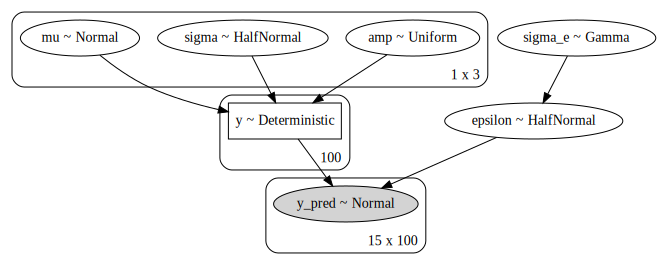

In [9]:
pm.model_to_graphviz(models[0])

In [10]:
# save model figure as image
img = pm.model_to_graphviz(models[0])
img.render(filename=file_basename + '_model', format='png');

# Collect results and save

In [11]:
# posterior predictive traces
ppc = [pm.sample_posterior_predictive(traces[i], samples=500, model=models[i]) for i in range(len(traces))]

/home/ppsda/venv/ppsda/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:01<00:00, 304.52it/s]
/home/ppsda/venv/ppsda/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:01<00:00, 275.72it/s]


In [12]:
varnames = ['amp', 'mu', 'sigma', 'epsilon']

# total dataset y-values, noise and run number list
ly_val = [val for run in range(nruns) for idx, val in enumerate(y_val)]
lnoise = [nl for run in range(nruns) for nl in noise_levels for i in range(nsets)]
lruns = ['{0}'.format(run+1) for run in range(nruns) for i in range(tsets)]

# collect the results and display
df = res.get_results_summary(varnames, traces, ppc, ly_val, epsilon_real=lnoise, runlist=lruns)
df

/home/ppsda/venv/ppsda/lib/python3.6/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,run
1,1.792,17.6343,2.7,0.983629,0.819621,5224.546374,1.363282,0.05,1
2,1.046,2.6305,6995.3,0.797742,0.906804,5396.323351,1.449872,0.05,1
3,1.497,1.2642,101.8,1.264172,0.999211,-3299.410427,0.079342,0.05,1
4,1.000,0.0000,35333.5,1.010989,0.999781,-3282.649651,0.080546,0.05,1
5,1.010,1.2969,2590.5,0.505033,0.720291,7475.069122,2.909367,0.05,1
6,1.375,0.5484,1384.7,1.251146,0.876761,5318.837708,1.421364,0.05,1
7,1.345,1.1971,291.5,1.154194,0.995257,1016.922391,0.338878,0.05,1
8,1.763,3.4459,10.2,0.497526,0.699698,7306.713303,1.415655,0.05,1
9,1.168,3.6623,31.6,0.441019,0.934793,4777.161077,1.161842,0.05,1
10,2.308,0.2235,34.0,0.003836,0.993789,1066.920371,0.361880,0.05,1


In [13]:
# save results to .csv
df.to_csv(file_basename + '.csv', index=False)

In [14]:
fp = open(out_path + 'settings.txt', 'a')
fp.write('stop : ' + datetime.datetime.now().strftime("%A, %d. %B %Y %I:%M%p") + '\n')
fp.close()